# Random Forest

## IMPORTING LIBRARIES

In [262]:
import pandas as pd
import matplotlib.pyplot as map
import seaborn as sea
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings

## Task-1. Exploratory Data Analysis (EDA):

In [265]:
glass_data=pd.read_excel('glass.xlsx',sheet_name='glass')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [267]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [268]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [269]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Task-2: Data Visualization:

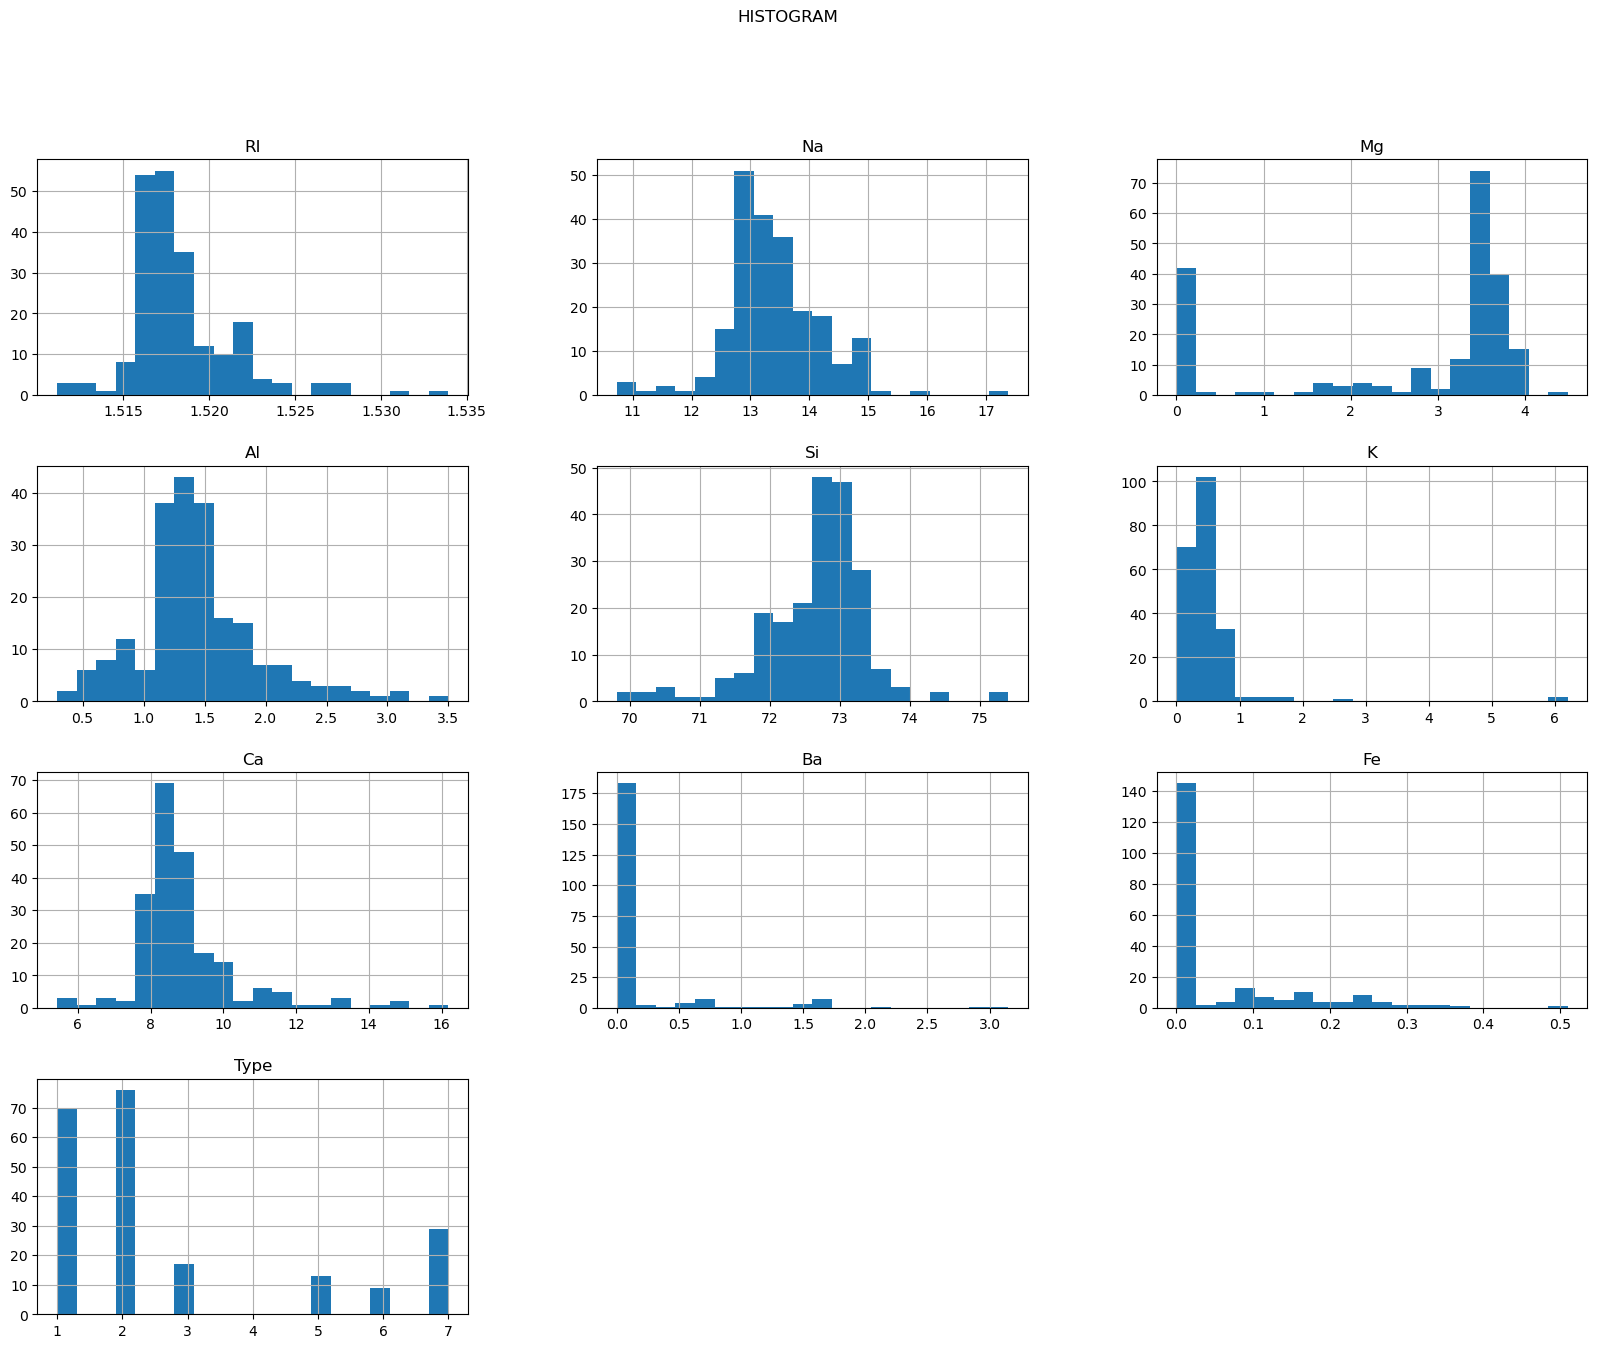

In [271]:
figure=(20,15)
glass_data.hist(bins=20,figsize=figure)
map.suptitle('HISTOGRAM')
map.show()

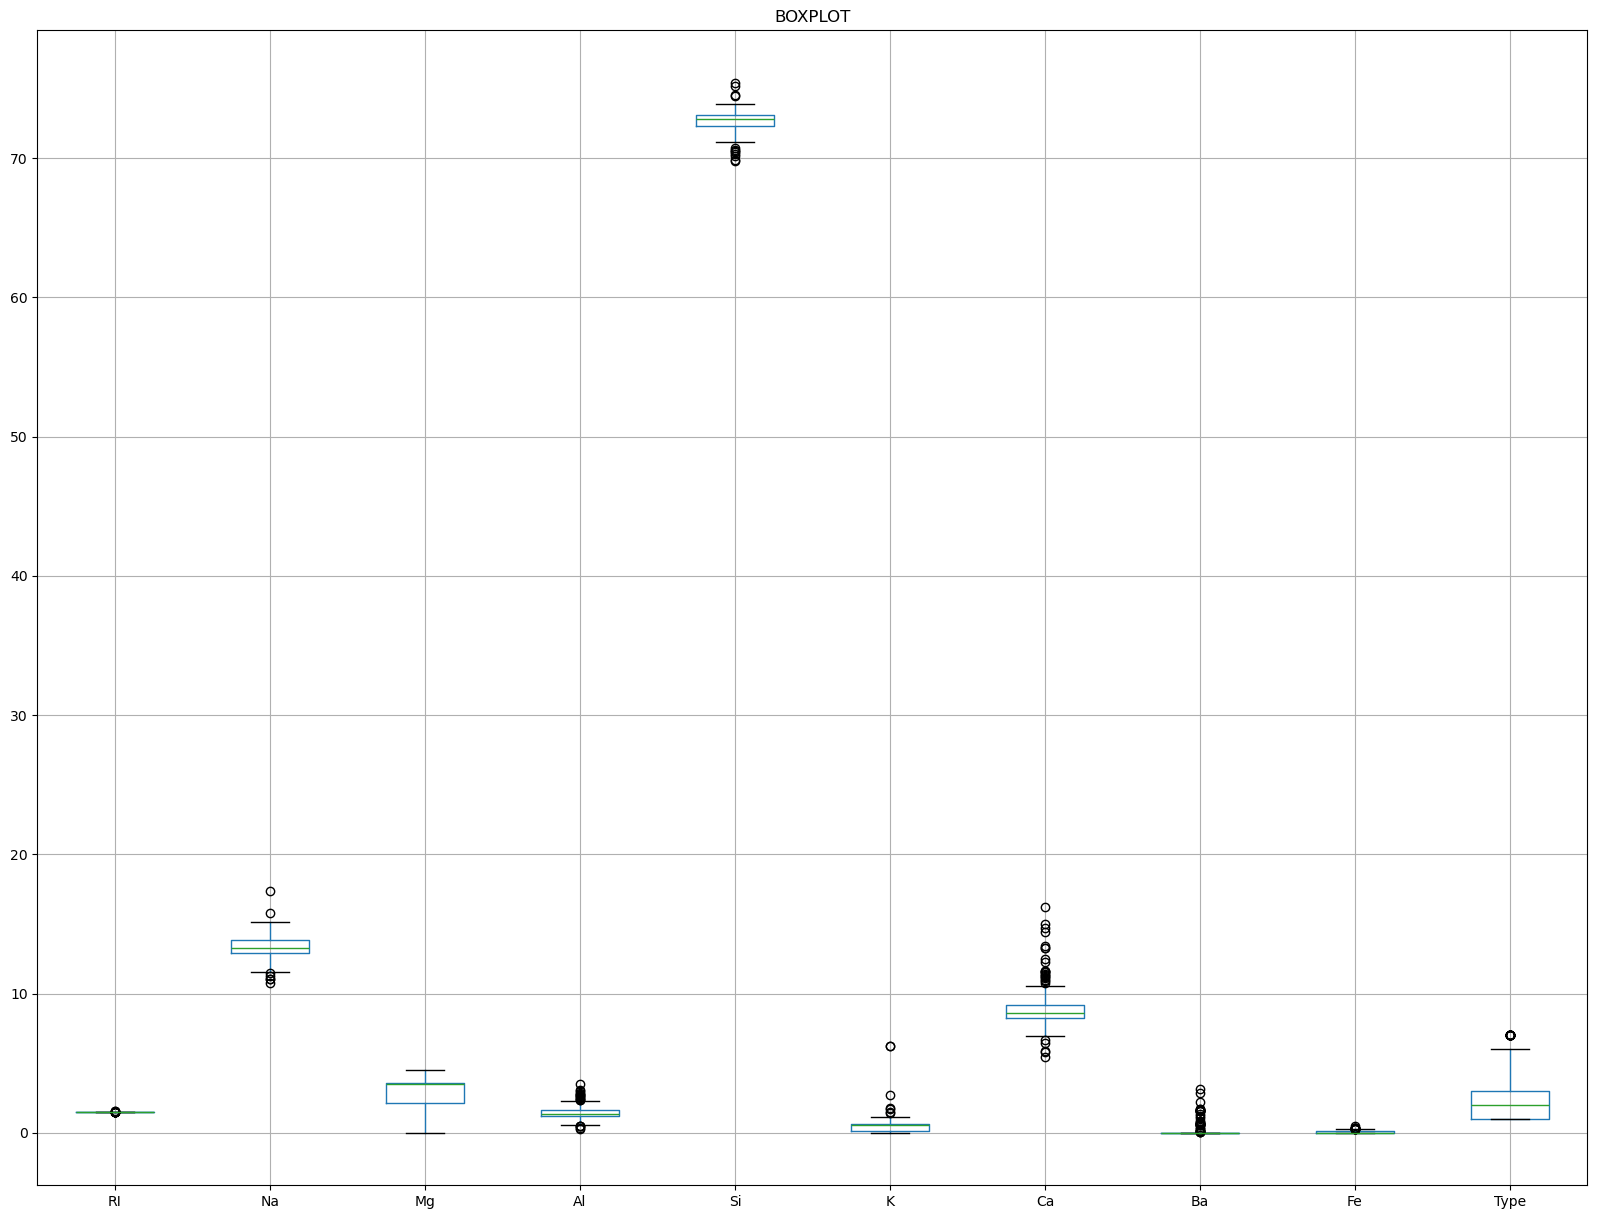

In [272]:
map.figure(figsize=(20,15))
glass_data.boxplot()
map.title('BOXPLOT')
map.show()

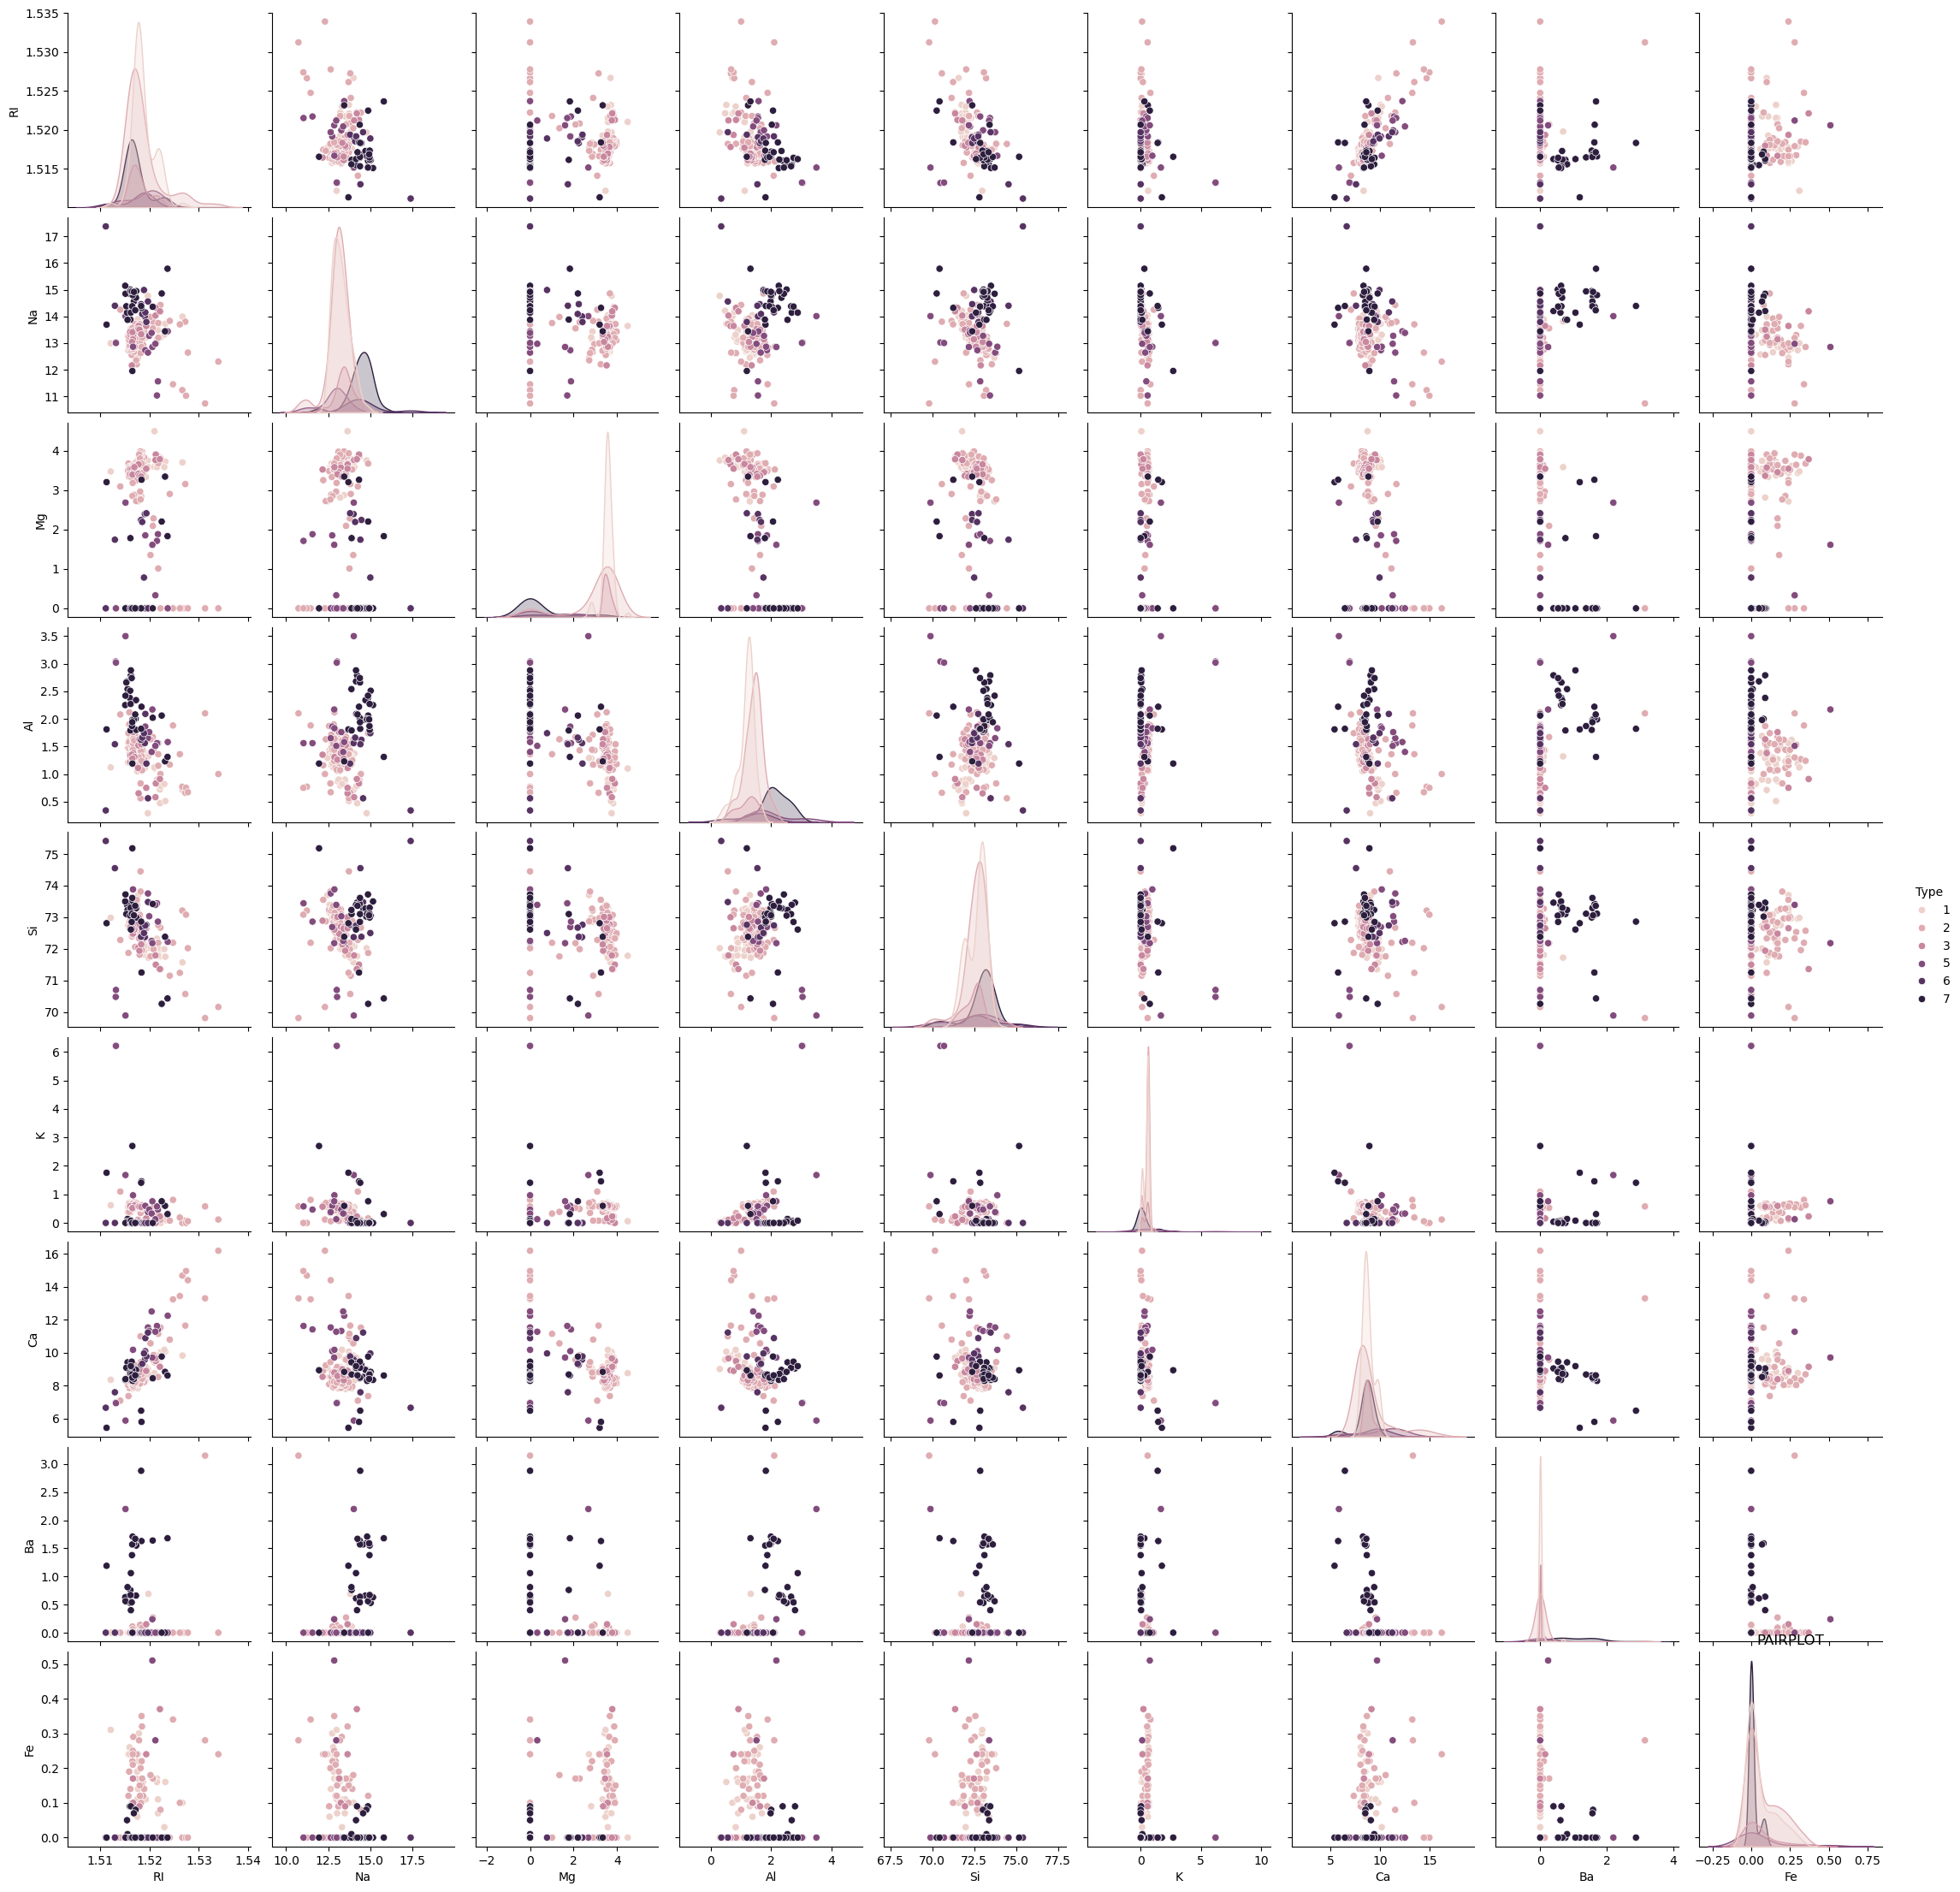

In [273]:
sea.pairplot(glass_data,hue='Type')
map.title('PAIRPLOT')
map.show()

## Task-3: Data Preprocessing

##### There is no null values in data
##### There is no categotical data

In [276]:
#STANDARDIZING THE DATA
stand=StandardScaler()
features=glass_data.drop(columns=['Type'])
scaled_data=stand.fit_transform(features)

In [277]:
data_scaled=pd.DataFrame(scaled_data,columns=features.columns)
data_scaled=pd.concat([data_scaled,glass_data['Type']],axis=1)
data_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [278]:
data_scaled.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Task-4: Random Forest Model Implementation

In [283]:
features=data_scaled.drop(columns=['Type'])
target=data_scaled['Type']

In [284]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

In [285]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


In [286]:
forest=RandomForestClassifier(n_estimators=100, max_features=3,random_state=42)
forest.fit(x_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [287]:
pred=forest.predict(x_test)
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 3, 6, 2, 1, 2, 6, 5, 7, 1, 1, 6, 2, 7,
       7, 7, 3, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 7, 5, 1, 1, 7, 2, 7, 1, 2,
       1, 6, 2, 1, 5, 1, 1, 1, 1, 2, 1, 2, 7, 2, 5, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [288]:
accuracy=accuracy_score(y_test,pred)
clas=classification_report(y_test,pred)
print('ACCURACT SCORE:',accuracy)
print('CLASSIFICATION REPORT:','\n',clas)

ACCURACT SCORE: 0.7692307692307693
CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



## Task-5: Bagging and Boosting Methods

#### BAGGING

In [291]:
bag=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100, max_features=3,random_state=42)
bag.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(), max_features=3,
                  n_estimators=100, random_state=42)

In [292]:
bag_pred=bag.predict(x_test)
bag_pred

array([2, 7, 1, 7, 2, 2, 1, 1, 2, 2, 7, 2, 1, 2, 2, 2, 7, 1, 2, 7, 2, 7,
       7, 7, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 7, 5, 1, 2, 2, 2, 7, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 2, 2, 7, 2],
      dtype=int64)

In [293]:
accu=accuracy_score(y_test,bag_pred)
print('BAGGING ACCURACY:',accu)

BAGGING ACCURACY: 0.6307692307692307


#### BOOSTING

In [296]:
warnings.simplefilter('ignore')
boo=AdaBoostClassifier(n_estimators=100,random_state=42)
boo.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [298]:
boo_pred=boo.predict(x_test)
boo_pred

array([1, 2, 1, 2, 1, 6, 1, 1, 1, 2, 6, 2, 1, 1, 6, 2, 2, 1, 1, 6, 2, 7,
       2, 7, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 6, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 2, 1, 1, 1, 1, 7, 2],
      dtype=int64)

In [299]:
acc=accuracy_score(y_test,boo_pred)
print('BOOSTING ACCURACY:',acc)

BOOSTING ACCURACY: 0.5076923076923077


#### When compared Bagging classifier is more accurate than compared to Boosting classifier

## INTERVIEW QUESTIONS

#### 1. Explain Bagging and Boosting methods. How is it different from each other.

##### Bagging:

##### 1)Trains models independently (parallel).
##### 2)Reduces variance.
##### 3)Example: Random Forest.


##### Boosting:

##### 1)Trains models sequentially (focus on errors).
##### 2)Reduces bias.
##### 3)Example: AdaBoost.